In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()


In [6]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurements= Base.classes.measurement
Station= Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
test= session.query(Measurements).limit(5).all()
for test in test:
     print(test.__dict__)

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002018E216D30>, 'prcp': 0.08, 'station': 'USC00519397', 'tobs': 65.0, 'date': '2010-01-01', 'id': 1}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002018E216EE0>, 'prcp': 0.0, 'station': 'USC00519397', 'tobs': 63.0, 'date': '2010-01-02', 'id': 2}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002018E216F10>, 'prcp': 0.0, 'station': 'USC00519397', 'tobs': 74.0, 'date': '2010-01-03', 'id': 3}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002018E216F70>, 'prcp': 0.0, 'station': 'USC00519397', 'tobs': 76.0, 'date': '2010-01-04', 'id': 4}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002018E22B040>, 'prcp': None, 'station': 'USC00519397', 'tobs': 73.0, 'date': '2010-01-06', 'id': 5}


In [11]:
from sqlalchemy import create_engine, inspect
# Get a list of column names and types
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
columns1 = inspector.get_columns('station')
for c in columns1:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
session.query(func.count(Measurements.date)).all()

[(19550)]

In [14]:
session.query(Measurements.date).order_by(Measurements.date).first()

('2010-01-01')

In [15]:
most_recent= session.query(Measurements.date).order_by(Measurements.date.desc()).first()
most_recent

('2017-08-23')

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
import datetime as dt
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)


Query Date:  2016-08-23


In [112]:
# Perform a query to retrieve the data and precipitation scores
sel=[Measurements.station,
     Measurements.date,
      Measurements.prcp,
    Measurements.tobs]

precip_year=session.query(*sel).filter((Measurements.date) >=query_date).group_by(Measurements.date).group_by(Measurements.prcp).all()
precip_year

[('USC00517948', '2016-08-23', None, 80.0),
 ('USC00519397', '2016-08-23', 0.0, 81.0),
 ('USC00519523', '2016-08-23', 0.02, 80.0),
 ('USC00514830', '2016-08-23', 0.05, 80.0),
 ('USC00513117', '2016-08-23', 0.15, 76.0),
 ('USC00516128', '2016-08-23', 0.7, 74.0),
 ('USC00519281', '2016-08-23', 1.79, 77.0),
 ('USC00517948', '2016-08-24', None, 78.0),
 ('USC00519397', '2016-08-24', 0.08, 79.0),
 ('USC00519523', '2016-08-24', 1.22, 79.0),
 ('USC00516128', '2016-08-24', 1.45, 74.0),
 ('USC00513117', '2016-08-24', 2.15, 76.0),
 ('USC00514830', '2016-08-24', 2.28, 80.0),
 ('USC00514830', '2016-08-25', 0.0, 81.0),
 ('USC00519281', '2016-08-25', 0.06, 80.0),
 ('USC00519397', '2016-08-25', 0.08, 80.0),
 ('USC00516128', '2016-08-25', 0.11, 77.0),
 ('USC00519523', '2016-08-25', 0.21, 80.0),
 ('USC00519397', '2016-08-26', 0.0, 79.0),
 ('USC00519281', '2016-08-26', 0.01, 80.0),
 ('USC00514830', '2016-08-26', 0.02, 81.0),
 ('USC00513117', '2016-08-26', 0.03, 78.0),
 ('USC00517948', '2016-08-26', 0.04,

In [113]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(precip_year)
df

,station,date,prcp,tobs
0,USC00517948,2016-08-23,NaN,80.0
1,USC00519397,2016-08-23,0.00,81.0
2,USC00519523,2016-08-23,0.02,80.0
3,USC00514830,2016-08-23,0.05,80.0
4,USC00513117,2016-08-23,0.15,76.0
...,...,...,...,...
1545,USC00519397,2017-08-22,0.00,82.0
1546,USC00516128,2017-08-22,0.50,76.0
1547,USC00519397,2017-08-23,0.00,81.0
1548,USC00519523,2017-08-23,0.08,82.0


In [114]:
sort_df=df[["prcp","date"]]
sort_df

,prcp,date
0,NaN,2016-08-23
1,0.00,2016-08-23
2,0.02,2016-08-23
3,0.05,2016-08-23
4,0.15,2016-08-23
...,...,...
1545,0.00,2017-08-22
1546,0.50,2017-08-22
1547,0.00,2017-08-23
1548,0.08,2017-08-23


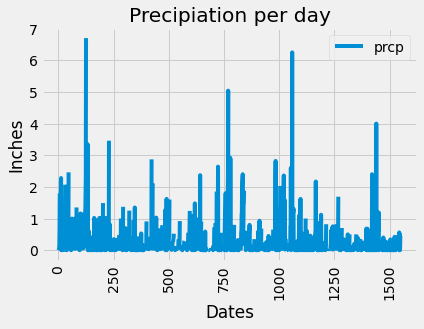

<Figure size 432x288 with 0 Axes>

In [169]:
# Use Pandas Plotting with Matplotlib to plot the data
sort_df.plot()
plt.title("Precipiation per day")
plt.ylabel("Inches")
plt.xlabel("Dates")
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()

In [170]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sort_df.describe()

,prcp
count,1374.000000
mean,0.256412
std,0.538142
min,0.000000
25%,0.010000
50%,0.060000
75%,0.250000
max,6.700000


# Exploratory Station Analysis

In [171]:
# Design a query to calculate the total number stations in the dataset
session.query(Measurements).filter(Measurements.date).group_by(Measurements.station).count()


9

In [186]:
#Check

sel=[Measurements.station,
     Measurements.date,
      Measurements.prcp,
    Measurements.tobs]

station_query=session.query(*sel).filter(Measurements.date).group_by(Measurements.date).group_by(Measurements.station).all()

df2=pd.DataFrame(station_query)
df2['station'].nunique()

9

In [187]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

sel4=[ Measurements.station,
      func.count(Measurements.station)]

session.query(*sel4).filter(Measurements.date).group_by(Measurements.station).all()



[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [188]:
#Check
df2['station'].value_counts()

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [190]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel5= [Measurements.station,
       func.min(Measurements.tobs),
       func.avg(Measurements.tobs),
       func.max(Measurements.tobs)
      ]

session.query(*sel5).filter(Measurements.date).filter(Measurements.station=='USC00519281').all()

[('USC00519281', 54.0, 71.66378066378067, 85.0)]

In [207]:
#check
df3['station'].describe()

count            2772
unique              1
top       USC00519281
freq             2772
Name: station, dtype: object

In [202]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel7=[Measurements.station,
     Measurements.date,
      Measurements.prcp,
    Measurements.tobs]

station_query2=session.query(*sel7).filter((Measurements.date) >=query_date).group_by(Measurements.date).group_by(Measurements.station).all()

df_4=pd.DataFrame(station_query2)

df_5=df_4.loc[df_4['station']=='USC00519281']

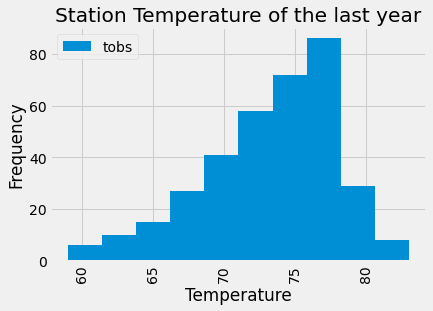

<Figure size 432x288 with 0 Axes>

In [203]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_df=df_5[['tobs','station']]
temp_df.plot(kind="hist")
plt.title("Station Temperature of the last year")
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()

In [93]:
# Design a query to calculate the total number stations in the dataset

station_count= session.query(Measurements).filter((Measurements.date) >=query_date).group_by(Measurements.station).count()
station_count

7

In [116]:
# Check: 
df['station'].nunique()

7

In [105]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

sel1=[Measurements.date,
      Measurements.station,
      Measurements.tobs,
      func.count(Measurements.station)]

Station_List=session.query(*sel1).filter((Measurements.date) >=query_date).group_by(Measurements.date).group_by(Measurements.station).all()
Station_List

[('2016-08-23', 'USC00513117', 76.0, 1),
 ('2016-08-23', 'USC00514830', 80.0, 1),
 ('2016-08-23', 'USC00516128', 74.0, 1),
 ('2016-08-23', 'USC00517948', 80.0, 1),
 ('2016-08-23', 'USC00519281', 77.0, 1),
 ('2016-08-23', 'USC00519397', 81.0, 1),
 ('2016-08-23', 'USC00519523', 80.0, 1),
 ('2016-08-24', 'USC00513117', 76.0, 1),
 ('2016-08-24', 'USC00514830', 80.0, 1),
 ('2016-08-24', 'USC00516128', 74.0, 1),
 ('2016-08-24', 'USC00517948', 78.0, 1),
 ('2016-08-24', 'USC00519281', 77.0, 1),
 ('2016-08-24', 'USC00519397', 79.0, 1),
 ('2016-08-24', 'USC00519523', 79.0, 1),
 ('2016-08-25', 'USC00513117', 77.0, 1),
 ('2016-08-25', 'USC00514830', 81.0, 1),
 ('2016-08-25', 'USC00516128', 77.0, 1),
 ('2016-08-25', 'USC00517948', 81.0, 1),
 ('2016-08-25', 'USC00519281', 80.0, 1),
 ('2016-08-25', 'USC00519397', 80.0, 1),
 ('2016-08-25', 'USC00519523', 80.0, 1),
 ('2016-08-26', 'USC00513117', 78.0, 1),
 ('2016-08-26', 'USC00514830', 81.0, 1),
 ('2016-08-26', 'USC00517948', 81.0, 1),
 ('2016-08-26', 

In [124]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
for station in session.query(Measurements).filter((Measurements.date) >=query_date).group_by(Measurements.station).all():
    print(station.station)

USC00513117
USC00514830
USC00516128
USC00517948
USC00519281
USC00519397
USC00519523


In [143]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
sel1=[ Measurements.station,
      func.count(Measurements.station)]

station_list2=session.query(*sel1).filter((Measurements.date) >=query_date).group_by(Measurements.station).all()
station_list2

[('USC00513117', 343),
 ('USC00514830', 305),
 ('USC00516128', 349),
 ('USC00517948', 183),
 ('USC00519281', 352),
 ('USC00519397', 361),
 ('USC00519523', 337)]

In [117]:
# Check
df['station'].value_counts()

USC00519397    361
USC00516128    259
USC00519281    226
USC00513117    225
USC00514830    205
USC00519523    148
USC00517948    126
Name: station, dtype: int64

In [164]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel3= [Measurements.station,
       func.min(Measurements.tobs),
       func.avg(Measurements.tobs),
       func.max(Measurements.tobs)
      ]

session.query(*sel3).filter((Measurements.date) >=query_date).filter(Measurements.station=='USC00519397').all()


[('USC00519397', 60.0, 75.21052631578948, 87.0)]

In [174]:
# check
station_df=df.loc[df['station']=='USC00519397']


mean_df=station_df.groupby('station').mean()['tobs']
max_df=station_df.groupby('station').max()['tobs']
min_df=station_df.groupby('station').min()['tobs']

check_temp= pd.DataFrame({"Min":min_df,
             "Avg":mean_df,
             "Max":max_df})
check_temp

,Min,Avg,Max
station,,,
USC00519397,60.0,75.210526,87.0


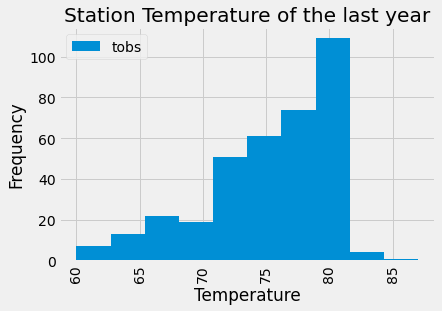

<Figure size 432x288 with 0 Axes>

In [175]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_df=station_df[['tobs','station']]
temp_df.plot(kind="hist")
plt.title("Station Temperature of the last year")
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()

In [155]:
# Close Session
session.close()